# Predict if a person has heart disease or not

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
Rwtestset = pd.read_csv('Realworldtestset.csv')
Rwtestset

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
0,223,53,1,4,123,282,0,0,95,1,2.0,2,2.0,7.0,0
1,74,44,1,4,110,197,0,2,177,0,0.0,1,1.0,3.0,1
2,236,56,1,4,130,283,1,2,103,1,1.6,3,0.0,7.0,2
3,126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0,3
4,264,61,1,4,138,166,0,2,125,1,3.6,2,1.0,3.0,4


In [214]:
data = pd.read_csv('Heartdiseases.csv')

In [215]:
df = data.copy(deep=True)

In [216]:
indices_to_drop = [223,74,236,126,264]
df.drop(indices_to_drop, inplace=True)

In [217]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
84,52,1,2,120,325,0,0,172,0,0.2,1,0.0,3.0,0
260,44,0,3,118,242,0,0,149,0,0.3,2,1.0,3.0,0
276,66,0,3,146,278,0,2,152,0,0.0,2,1.0,3.0,0
177,56,1,4,132,184,0,2,105,1,2.1,2,1.0,6.0,1
251,58,1,4,146,218,0,0,105,0,2.0,2,1.0,7.0,1
249,62,1,2,128,208,1,2,140,0,0.0,1,0.0,3.0,0
79,58,1,4,150,270,0,2,111,1,0.8,1,0.0,7.0,3
242,49,0,4,130,269,0,0,163,0,0.0,1,0.0,3.0,0
17,54,1,4,140,239,0,0,160,0,1.2,1,0.0,3.0,0
241,41,0,2,126,306,0,0,163,0,0.0,1,0.0,3.0,0


In [218]:
df.shape

(298, 14)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       298 non-null    int64  
 1   sex       298 non-null    int64  
 2   cp        298 non-null    int64  
 3   trestbps  298 non-null    int64  
 4   chol      298 non-null    int64  
 5   fbs       298 non-null    int64  
 6   restecg   298 non-null    int64  
 7   thalach   298 non-null    int64  
 8   exang     298 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     298 non-null    int64  
 11  ca        294 non-null    float64
 12  thal      296 non-null    float64
 13  type      298 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.9 KB


In [220]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,294.000000,296.000000,298.000000
mean,54.446309,0.677852,3.144295,131.546980,246.751678,0.144295,0.979866,149.993289,0.318792,1.019463,1.590604,0.663265,4.722973,0.909396
std,9.085016,0.468085,0.961892,17.240997,51.781840,0.351980,0.994732,22.562744,0.466792,1.144989,0.608729,0.937762,1.937396,1.212385
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.250000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,240.500000,0.000000,0.000000,153.000000,0.000000,0.750000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### About the columns

- age: Age of the individual (in years).
- sex: Gender of the individual (1 = male, 0 = female).
- cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
- trestbps: Resting blood pressure (in mm Hg) when admitted to the hospital.
- chol: Serum cholesterol level (in mg/dL).
- fbs: Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).
- restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
- thalach: Maximum heart rate achieved.
- exang: Exercise-induced angina (1 = yes, 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: Thallium stress test result - a radioactive isotope often used in stress testing (3 = normal; 6 = fixed defect; 7 = reversible defect).
- type: Presence or absence of heart disease (1 = presence, 0 = absence).


In [221]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [222]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
252,64,1,4,128,263,0,0,105,1,0.2,2,1.0,7.0,0
85,44,1,3,140,235,0,2,180,0,0.0,1,0.0,3.0,0
283,35,1,2,122,192,0,0,174,0,0.0,1,0.0,3.0,0
155,70,1,4,130,322,0,2,109,0,2.4,2,3.0,3.0,1


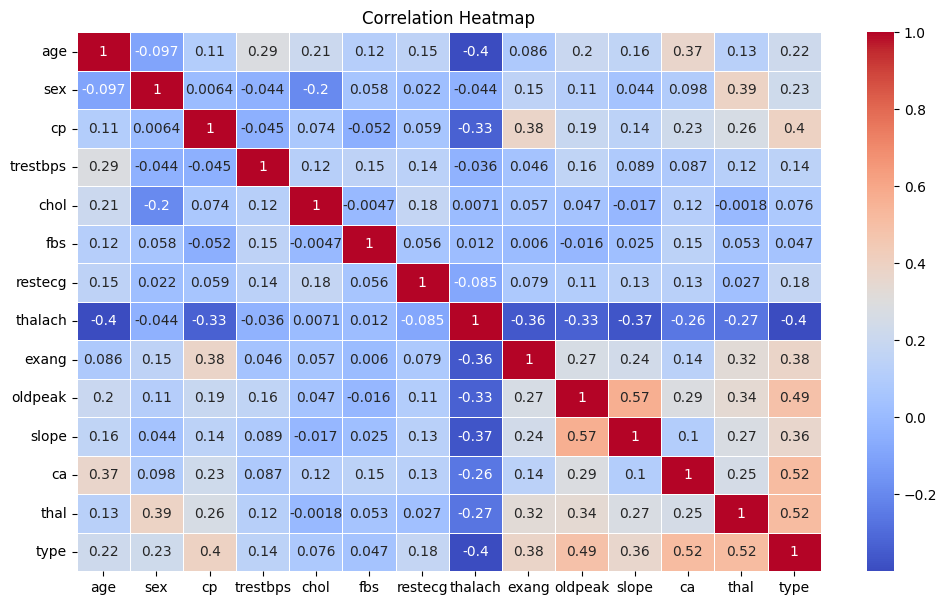

In [223]:


plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [224]:
mapping = {
     1 : 1,
     2 : 1,
     3 : 1,
     4 : 1,
     0 : 0
}

df['type'] = df["type"].map(mapping)


<Axes: xlabel='type', ylabel='count'>

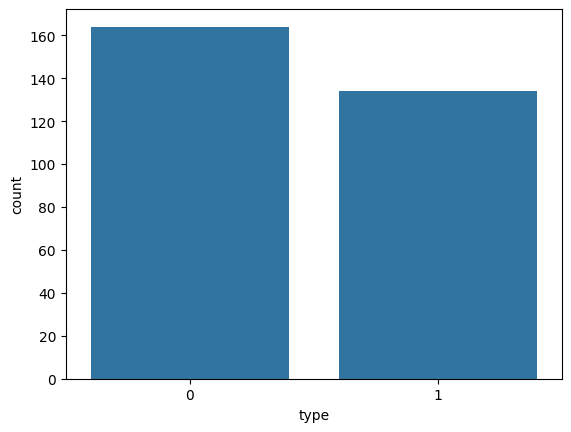

In [225]:
sns.barplot(data=df['type'].value_counts())

<Axes: xlabel='sex', ylabel='count'>

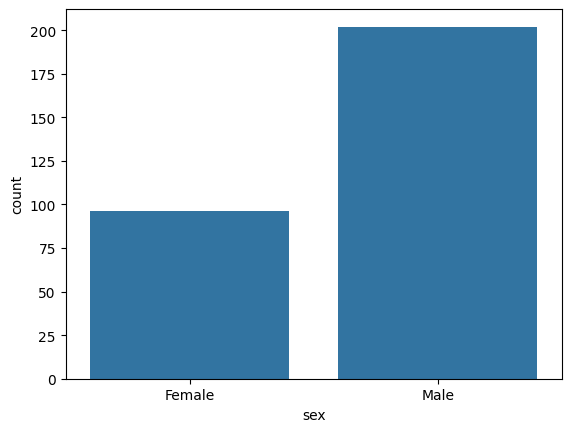

In [226]:
plt.xticks([0, 1],["Female", "Male"])
sns.barplot(df['sex'].value_counts())

In [227]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
type        0
dtype: int64

In [228]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
type        0
dtype: int64

In [229]:
df=df.dropna(axis=0)

In [230]:
df.shape

(292, 14)

In [231]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'type'],
      dtype='object')

<Axes: xlabel='thal', ylabel='Density'>

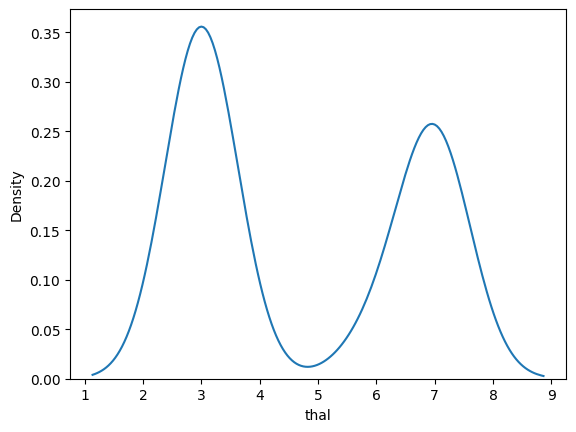

In [232]:
sns.kdeplot(df['thal'])

In [233]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,type
187,66,1,2,160,246,0,0,120,1,0.0,2,3.0,6.0,1
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,1
10,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
31,60,1,4,117,230,1,0,160,1,1.4,1,2.0,7.0,1
235,54,1,4,122,286,0,2,116,1,3.2,2,2.0,3.0,1


In [234]:
from sklearn.model_selection import train_test_split

X = df.drop('type', axis=1)  # Replace 'target' with the actual name of your target variable
y = df['type']

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [235]:
print(X_train.shape,X_valid.shape,X_test.shape)

(174, 13) (59, 13) (59, 13)


### Feature selection

In [319]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42,max_depth=9,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

In [320]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_train)
print("Accuracy Score =", format(accuracy_score(y_train,predictions)))

Accuracy Score = 1.0


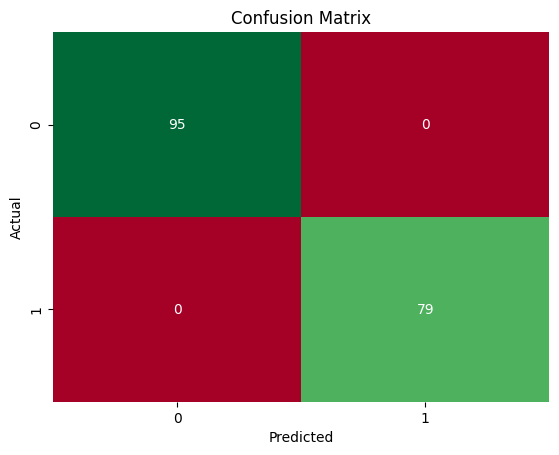

In [321]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_train)
cm = confusion_matrix(y_train, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [322]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = model.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction)))
print("Recall = ",format(recall_score(y_train,prediction)))
print("F-1 Score = ",format(f1_score(y_train,prediction)))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


[Text(0.6294642857142857, 0.95, 'x[11] <= 0.5\ngini = 0.496\nsamples = 174\nvalue = [95, 79]'),
 Text(0.3898809523809524, 0.85, 'x[12] <= 4.5\ngini = 0.373\nsamples = 109\nvalue = [82, 27]'),
 Text(0.23809523809523808, 0.75, 'x[4] <= 326.0\ngini = 0.18\nsamples = 70\nvalue = [63, 7]'),
 Text(0.19047619047619047, 0.65, 'x[9] <= 3.55\ngini = 0.117\nsamples = 64\nvalue = [60, 4]'),
 Text(0.16666666666666666, 0.55, 'x[3] <= 158.0\ngini = 0.091\nsamples = 63\nvalue = [60, 3]'),
 Text(0.11904761904761904, 0.45, 'x[7] <= 154.5\ngini = 0.063\nsamples = 61\nvalue = [59, 2]'),
 Text(0.09523809523809523, 0.35, 'x[7] <= 153.5\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.07142857142857142, 0.25, 'x[3] <= 109.0\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.047619047619047616, 0.15, 'x[9] <= 0.3\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.023809523809523808, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07142857142857142, 0.05, 'gini = 0.0\nsamples = 2\nvalu

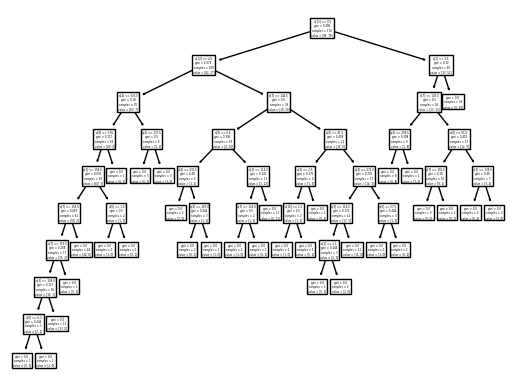

In [323]:
from sklearn.tree import plot_tree
plot_tree(model)

In [324]:
pred_score = model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test,pred_score)

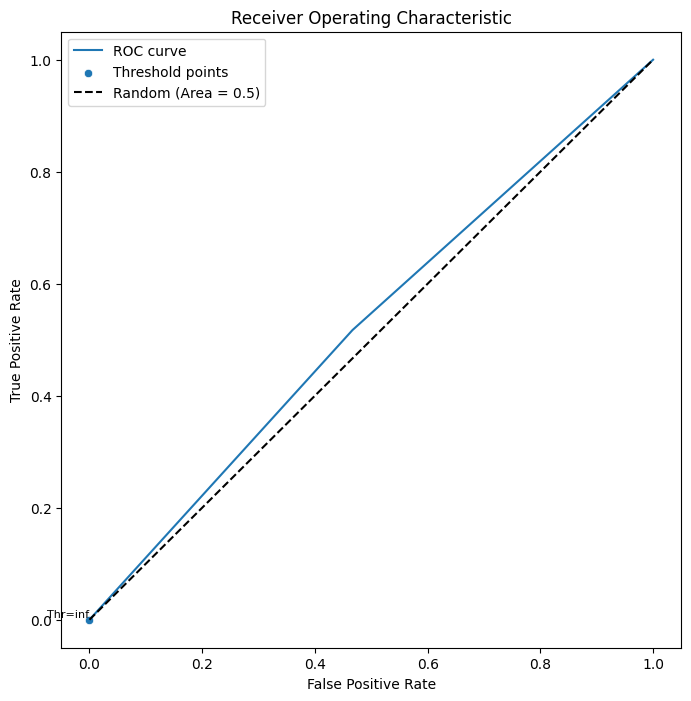

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the data
roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

# Plot ROC curve
plt.figure(figsize=(8, 8))
sns.lineplot(data=roc_data, x='fpr', y='tpr', label='ROC curve')

# Plot threshold points
n = 10
indices = np.arange(len(thresholds)) % n == 0
sns.scatterplot(data=roc_data[indices], x='fpr', y='tpr', label='Threshold points')

# Add text labels for threshold points
for index, row in roc_data[indices].iterrows():
    plt.text(row['fpr'], row['tpr'], f"Thr={row['thresholds']:.2f}", fontsize=8, ha='right', va='bottom')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random (Area = 0.5)')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [326]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 1.0


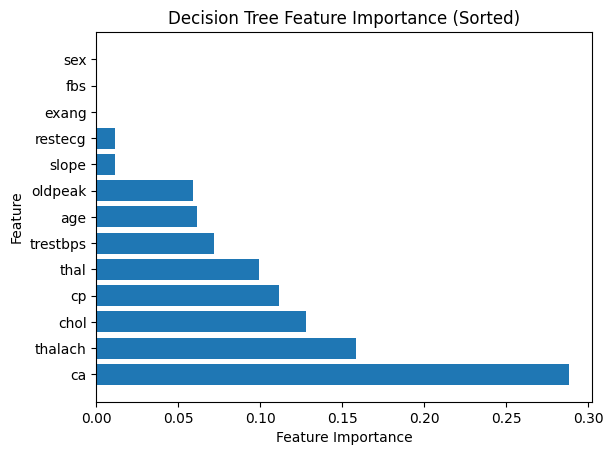

In [327]:
import matplotlib.pyplot as plt

# Assuming 'features' and 'feature_importances' are already defined
# You can sort them based on feature_importances
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a horizontal bar chart
plt.barh(sorted_features, sorted_importances)

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance (Sorted)')

# Show the plot
plt.show()


In [328]:
threshold = 0.06  # Set your own threshold
selected_features = features[feature_importances > threshold]
selected_features

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'ca', 'thal'], dtype='object')


- age: Age of the individual (in years).
- sex: Gender of the individual (1 = male, 0 = female).
- cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
- trestbps: Resting blood pressure (in mm Hg) when admitted to the hospital.
- chol: Serum cholesterol level (in mg/dL).
- fbs: Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).
- restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
- thalach: Maximum heart rate achieved.
- exang: Exercise-induced angina (1 = yes, 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
- ca: Number of major vessels (0-3) colored by fluoroscopy.
- thal: Thallium stress test result - a radioactive isotope often used in stress testing (3 = normal; 6 = fixed defect; 7 = reversible defect).
- type: Presence or absence of heart disease (1 = presence, 0 = absence).